In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
X1 = np.array([10, 15, 20, 30, 50, 60, 60, 70]).reshape(-1, 1)
Y = np.array([0.8, 1.0, 1.8, 2.0, 3.2, 3.0, 3.1, 3.5]).reshape((-1, 1))

In [4]:
X = np.column_stack((np.ones_like(X1), X1))

print(X)
print(Y)

[[ 1 10]
 [ 1 15]
 [ 1 20]
 [ 1 30]
 [ 1 50]
 [ 1 60]
 [ 1 60]
 [ 1 70]]
[[0.8]
 [1. ]
 [1.8]
 [2. ]
 [3.2]
 [3. ]
 [3.1]
 [3.5]]


In [5]:
X = np.mat(X)
Y = np.mat(Y)

In [6]:
theta = (X.T * X).I * X.T * Y
print(theta)

[[0.5949305 ]
 [0.04330335]]


In [7]:
predict_y = X * theta
print(predict_y)

[[1.02796402]
 [1.24448078]
 [1.46099755]
 [1.89403107]
 [2.76009812]
 [3.19313164]
 [3.19313164]
 [3.62616517]]


In [8]:
x_test = [[1, 55]]
y_test_hat = x_test * theta
print(y_test_hat)

[[2.97661488]]


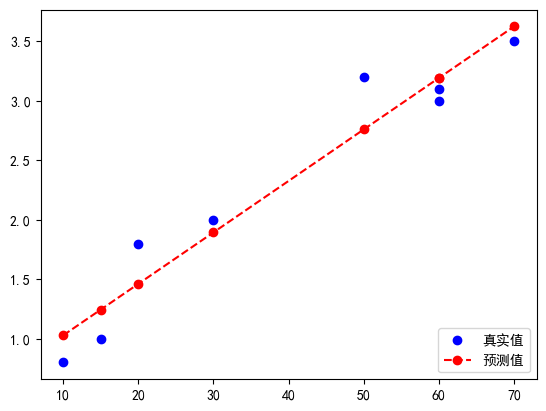

In [9]:
plt.plot(X1, Y, 'bo', label=u'真实值')
plt.plot(X1, predict_y, 'r--o', label=u'预测值')
plt.legend(loc='lower right')
plt.show()

In [10]:
x = np.mat(np.array([[1.0, 55.0]]))
pred_y = x * theta
print(pred_y)

[[2.97661488]]


In [11]:
X1 = np.array([
    [10, 1],
    [15, 1],
    [20, 1],
    [30, 1],
    [50, 2],
    [60, 1],
    [60, 2],
    [70, 2]]).reshape((-1, 2))
Y = np.array([0.8, 1.0, 1.8, 2.0, 3.2, 3.0, 3.1, 3.5]).reshape((-1, 1))
print(X1)

[[10  1]
 [15  1]
 [20  1]
 [30  1]
 [50  2]
 [60  1]
 [60  2]
 [70  2]]


In [12]:
flag = True
if flag:
    X = np.column_stack((X1, np.ones(shape=(X1.shape[0], 1))))
else:
    X = X1
print(X)

[[10.  1.  1.]
 [15.  1.  1.]
 [20.  1.  1.]
 [30.  1.  1.]
 [50.  2.  1.]
 [60.  1.  1.]
 [60.  2.  1.]
 [70.  2.  1.]]


In [13]:
X = np.mat(X)
Y = np.mat(Y)

In [14]:
theta = (X.T * X).I * X.T * Y
print(theta)

[[0.03921348]
 [0.25262172]
 [0.40861423]]


In [15]:
predict_y = X * theta
print(predict_y)

[[1.05337079]
 [1.2494382 ]
 [1.44550562]
 [1.83764045]
 [2.87453184]
 [3.01404494]
 [3.26666667]
 [3.6588015 ]]


In [16]:
if flag:
    x = np.mat(np.array([[55.0, 2.0, 1.0]]))
else:
    x = np.mat(np.array([[55.0, 2.0]]))

pred_y = x * theta
print(pred_y)

[[3.07059925]]


In [17]:
# 四、画图可视化(TODO: 自己更改为立体的图像)
from mpl_toolkits.mplot3d import Axes3D
%matplotlib tk

x1 = X[:, 0]
# print(x1)
x2 = X[:, 1]
# print(x2)
fig = plt.figure(facecolor='w')
ax = Axes3D(fig)
ax.scatter(x1, x2, Y, s=40, c='r', depthshade=False)  ###画点图

x1 = np.arange(0, 100)
x2 = np.arange(0, 4)
x1, x2 = np.meshgrid(x1, x2)


# print(x1)
def predict(x1, x2, theta, base=False):
    if base:
        y_ = x1 * theta[0] + x2 * theta[1] + theta[2]
    else:
        y_ = x1 * theta[0] + x2 * theta[1]
    return y_


z = np.array(list(map(lambda t: predict(t[0], t[1], theta, base=flag), zip(x1.flatten(), x2.flatten()))))
z.shape = x1.shape
print(z.shape)
ax.plot_surface(x1, x2, z, rstride=1, cstride=1, cmap=plt.cm.jet)  ##画超平面   cmap=plt.cm.jet彩图
ax.set_title(u'房屋租赁价格预测')
plt.show()

(4, 100)


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
data = pd.read_csv('datas/boston_housing.data', sep='\s+', header=None)

X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [20]:
xTarin, xTest, yTarin, yTest = train_test_split(X, Y, test_size=0.3, random_state=10)

In [21]:
linear = LinearRegression(fit_intercept=True)

In [22]:
linear.fit(xTarin, yTarin)
print(linear.intercept_)
print(linear.coef_)

34.24483703390682
[-1.53776087e-01  6.50159270e-02 -2.42597326e-02  1.62203309e+00
 -1.52999306e+01  3.35196668e+00  1.13259963e-02 -1.54810871e+00
  3.02641886e-01 -1.22317535e-02 -8.11539044e-01  1.29504798e-02
 -5.44861583e-01]


In [23]:
yPredict = linear.predict(xTest)
y_train_hat = linear.predict(xTarin)

print(linear.score(xTarin, yTarin))
print(linear.score(xTest, yTest))

0.7495400632086622
0.6996255772983111


In [24]:
plt.plot(range(len(xTarin)), yTarin, 'r', label=u'true')
plt.plot(range(len(xTarin)), y_train_hat, 'g', label=u'predict')
plt.legend(loc='upper right')
plt.show(block=True)

In [25]:
plt.plot(range(len(xTest)), yTest, 'r', label=u'true')
plt.plot(range(len(xTest)), yPredict, 'g', label=u'predict')
plt.legend(loc='upper right')
plt.show(block=True)